In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Const
c = 3*10**(8) # light velocity

# Parameters
n_a = 3
n_b = 3.5
a = 1
b = n_a * a / n_b
#print(b)

n_out = 1
m_in = 6

omega_central = 2*np.pi*c/(4*n_a*a)

In [3]:
# Transfer matrix

# a - thicness of layer
# n - refractive index of layer
# k = n*k_0
# |k| = 2 pi / lambda

def trans_matrix_a(a,n,omega):
    k = omega * n/c
    T_a = np.array([[np.cos(k*a),1j/n*np.sin(k*a)],[1j*n*np.sin(k*a),np.cos(k*a)]])
    return T_a

In [4]:
def reflection_coeff(n_left, n_right, Tm):
    t11 = Tm[0,0]
    t12 = Tm[0,1]
    t21 = Tm[1,0]
    t22 = Tm[1,1]
    num = n_right*t11 + n_left*n_right*t12 - t21 - n_left*t22
    denom = t21 - n_left*t22 - n_right*t11 + n_left*n_right*t12
    return num/denom

# rs = reflection_coeff(n_out,n_out,T_m)
# print(rs)

In [5]:
def transmission_coeff(n_left, n_right, Tm):
    t11 = Tm[0,0]
    t12 = Tm[0,1]
    t21 = Tm[1,0]
    t22 = Tm[1,1]
    num = t12*t21 - t11*t22
    denom = t21 - n_left*t22 - n_right*t11 + n_left*n_right*t12
    return 2*n_left * num/denom

# ts = transmission_coeff(n_out,n_out,T_m)
# print(ts)

In [6]:
def get_r_QW(omega0, Gamma0, gamma, omega):
    rQW = 1j * Gamma0 / (omega0-omega-1j*(Gamma0+gamma))
    return rQW

def trans_matrix_QW(rs,n):
    T = np.array([[1,0],[2*n*rs/(1+rs),1]])
    return T

# transition matrix across m layer structure
def getMatrixQW(omega,m,Gamma0,omega_ex):
    T_a = trans_matrix_a(a,n_a,omega)
    T_b = trans_matrix_a(b,n_b,omega)
    # prawa strona
    T_ba = np.dot(T_b,T_a) # transition matrix across one ba layer
    T_r = np.linalg.matrix_power(T_ba,m)
    # studnia
    omega_central = 2*np.pi*c/(4*n_a*a)
    rs = get_r_QW(omega_ex,Gamma0,0,omega)
    T_qw = trans_matrix_QW(rs,n_b)
    # mikrownęka
    #T = T_b
    # lewa strona
    T_ab = np.dot(T_b,T_a) # transition matrix across one ab layer
    T_l = np.linalg.matrix_power(T_ab,m)

    T_m = np.linalg.multi_dot([T_r,T_qw,T_b,T_l])

    return T_m

In [7]:
xQW = np.linspace(omega_central-40000000,omega_central+40000000,3000)

ref_coeffsQW = []
ref_coeffsQW4 = []
ref_coeffsQW12 = []

Gamma0 = 746659

for i in xQW:
    matrix = getMatrixQW(i,m_in,Gamma0,omega_central)
    ref_coeffsQW.append(reflection_coeff(n_out, n_out, matrix))

    matrix4 = getMatrixQW(i,4,Gamma0,omega_central)
    ref_coeffsQW4.append(reflection_coeff(n_out, n_out, matrix4))

    matrix12 = getMatrixQW(i,12,Gamma0,omega_central)
    ref_coeffsQW12.append(reflection_coeff(n_out, n_out, matrix12))

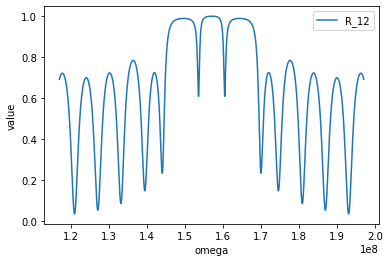

In [8]:
R_QW = []
R_QW4 = []
R_QW12 = []

for i in range(len(ref_coeffsQW)):
    R_QW.append(np.abs(ref_coeffsQW[i])*np.abs(ref_coeffsQW[i]))
    R_QW4.append(np.abs(ref_coeffsQW4[i])*np.abs(ref_coeffsQW4[i]))
    R_QW12.append(np.abs(ref_coeffsQW12[i])*np.abs(ref_coeffsQW12[i]))

#plt.plot(xQW,R_QW4,label='R_4')
#plt.plot(xQW,R_QW,label='R_6')
plt.plot(xQW,R_QW12,label='R_12')

plt.xlabel('omega')
plt.ylabel('value')
plt.legend()

Gamma_0 = 746659 - widoczne rozszczepienie

sprawdzam zależność dla zmieniającej się (rosnącej) omega_0

do tej pory omega_0 = omega_central

teraz omega_0 = omega_ex + omega_1

omega_ex - bazowa częstość ekscytonów przy niskiej gęstości

omega_1 - przesunięcie

162188002.13597512 0.49345712118094887
162214677.69449463 0.4747131908330923
162241353.25301415 0.4804583511188281


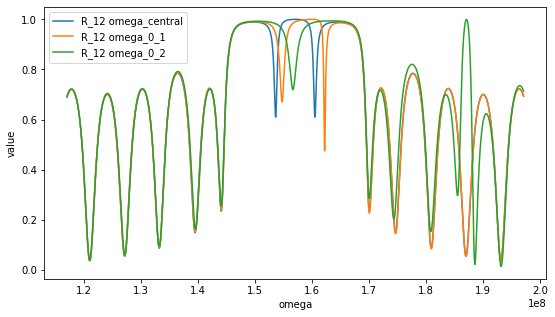

In [9]:
ref_coeffsQW_1 = []
ref_coeffsQW_2 = []
ref_coeffsQW_3 = []

Gamma0 = 746659
omega_1 = 3000000
omega_01 = omega_central + omega_1
omega_02 = omega_central + 10 * omega_1

for i in xQW:
    matrix12 = getMatrixQW(i,12,Gamma0,omega_central)
    ref_coeffsQW_1.append(reflection_coeff(n_out, n_out, matrix12))
    
    matrix12n = getMatrixQW(i,12,Gamma0,omega_01)
    ref_coeffsQW_2.append(reflection_coeff(n_out, n_out, matrix12n))
    
    matrix12n2 = getMatrixQW(i,12,Gamma0,omega_02)
    ref_coeffsQW_3.append(reflection_coeff(n_out, n_out, matrix12n2))
    
R_QW_1 = []
R_QW_2 = []
R_QW_3 = []

for i in range(len(ref_coeffsQW_1)):
    R_QW_1.append(np.abs(ref_coeffsQW_1[i])*np.abs(ref_coeffsQW_1[i]))
    R_QW_2.append(np.abs(ref_coeffsQW_2[i])*np.abs(ref_coeffsQW_2[i]))
    R_QW_3.append(np.abs(ref_coeffsQW_3[i])*np.abs(ref_coeffsQW_3[i]))
    if xQW[i] > 1.5*10**8 and xQW[i] < 1.65*10**8:
        if np.abs(ref_coeffsQW_2[i])*np.abs(ref_coeffsQW_2[i]) < 0.5:
            print(xQW[i],np.abs(ref_coeffsQW_2[i])*np.abs(ref_coeffsQW_2[i]))

plt.figure(figsize=(9,5))
    
plt.plot(xQW,R_QW_1,label='R_12 omega_central')
plt.plot(xQW,R_QW_2,label='R_12 omega_0_1')
plt.plot(xQW,R_QW_3,label='R_12 omega_0_2')

plt.xlabel('omega')
plt.ylabel('value')
plt.legend()

Wyznaczenie amplitudy pola elektrycznego E w punkcie gdzie znajduje się studnia kwantowa.

In [21]:
A_plus = 3+2j

# wyznaczanie A_minus
def getA(omega,omega_0,m=12,Gamma0 = 746659):
    matrix = getMatrixQW(omega,m,Gamma0,omega_0)
    r = reflection_coeff(n_out, n_out, matrix)
    t = transmission_coeff(n_out, n_out, matrix)
    R = np.abs(r)**2
#     print('R = ', R)
#     print('T = ', np.abs(t)**2)
    
    A_minus = r*A_plus
#     print(A_minus)
    return A_minus

getA(162214677.69449463,omega_central)

(-1.3846162886827598+3.2851887244987266j)

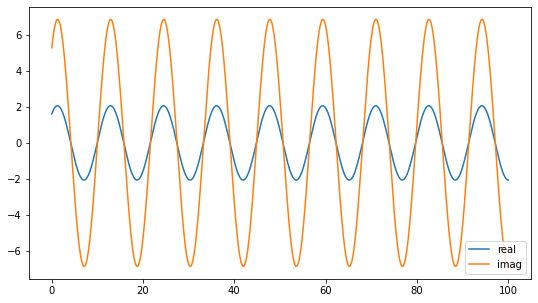

In [22]:
zs = np.linspace(0,100,2000)

def myEBvector(z,omega_0):
    k=162214677.69449463/c
    A_minus = getA(162214677.69449463,omega_0)
    E = A_plus * np.exp(1j*k*z) + A_minus * np.exp(-1j*k*z)
    cB = (n_out * A_plus * np.exp(1j*k*z) - n_out * A_minus * np.exp(-1j*k*z))*c
    return E,cB

#myEBvector(zs,omega_central)[0]
ys = np.real(myEBvector(zs,omega_central)[0])
ysi = np.imag(myEBvector(zs,omega_central)[0])

plt.figure(figsize=(9,5))  
plt.plot(zs,ys, label='real')
plt.plot(zs,ysi, label='imag')
plt.legend()

In [23]:
def getMtoQW(omega,m,Gamma0,omega_ex):
    T_a = trans_matrix_a(a,n_a,omega)
    T_b = trans_matrix_a(b,n_b,omega)   
    # mikrownęka
    #T = T_b
    # lewa strona
    T_ab = np.dot(T_b,T_a) # transition matrix across one ab layer
    T_l = np.linalg.matrix_power(T_ab,m)
    # studnia
    omega_central = 2*np.pi*c/(4*n_a*a)
    rs = get_r_QW(omega_ex,Gamma0,0,omega)
    T_qw = trans_matrix_QW(rs,n_b)
    
    T_m = np.linalg.multi_dot([T_qw,T_b,T_l])
    return T_m

def myEB_QW(z,omega_1i):
    #print(myEB(z))
    omega = 162214677.69449463
    M_q = getMtoQW(omega,12,Gamma0,omega_central+omega_1i)
    E,cB = np.dot(M_q,myEBvector(z,omega_central+omega_1i))

    return E,cB

1763833086.362768
1752055055.368314


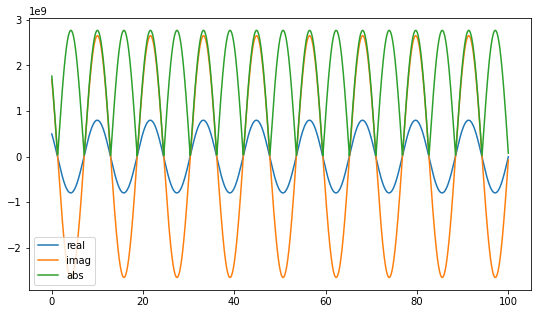

In [24]:
# E, B w studni
print(np.abs(myEB_QW(0,0)[0]))

E_q = []
cB_q = []
for i in zs:
    E_q.append(myEB_QW(i,0)[0])
    cB_q.append(myEB_QW(i,0)[1]/c)
    
    
plt.figure(figsize=(9,5))  
plt.plot(zs,np.real(E_q), label='real')
plt.plot(zs,np.imag(E_q), label='imag')
plt.plot(zs,np.abs(E_q), label='abs')
print(np.average(np.abs(E_q)))
plt.legend()

|E|^2 = ???

1920888725.1610088


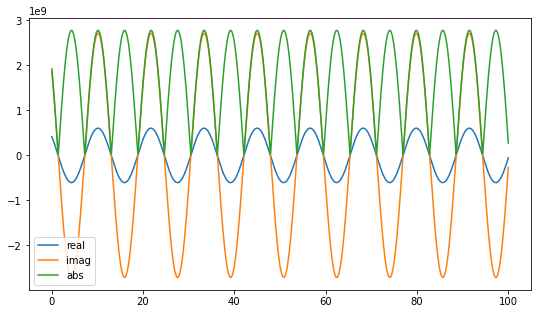

In [27]:
omega_1n = 1920888725.1610088**2

# E, B w studni
print(np.abs(myEB_QW(0,omega_1n)[0]))

E_q = []
cB_q = []
for i in zs:
    E_q.append(myEB_QW(i,omega_1n)[0])
    cB_q.append(myEB_QW(i,omega_1n)[1]/c)
    
    
plt.figure(figsize=(9,5))  
plt.plot(zs,np.real(E_q), label='real')
plt.plot(zs,np.imag(E_q), label='imag')
plt.plot(zs,np.abs(E_q), label='abs')
plt.legend()

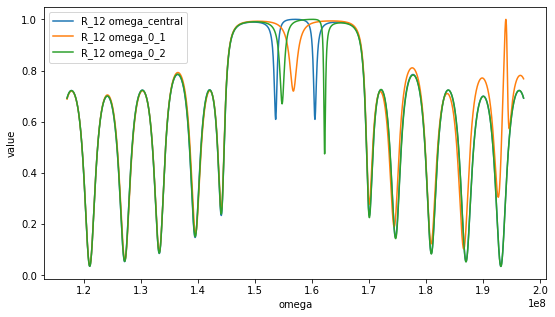

In [28]:
ref_coeffsQW_1 = []
ref_coeffsQW_2 = []
ref_coeffsQW_3 = []

Gamma0 = 746659
omega_01 = omega_central + omega_1n/(10**11)
omega_02 = omega_central + 3000000

for i in xQW:
    matrix12 = getMatrixQW(i,12,Gamma0,omega_central)
    ref_coeffsQW_1.append(reflection_coeff(n_out, n_out, matrix12))
    
    matrix12n = getMatrixQW(i,12,Gamma0,omega_01)
    ref_coeffsQW_2.append(reflection_coeff(n_out, n_out, matrix12n))
    
    matrix12n2 = getMatrixQW(i,12,Gamma0,omega_02)
    ref_coeffsQW_3.append(reflection_coeff(n_out, n_out, matrix12n2))
    
R_QW_1 = []
R_QW_2 = []
R_QW_3 = []

for i in range(len(ref_coeffsQW_1)):
    R_QW_1.append(np.abs(ref_coeffsQW_1[i])*np.abs(ref_coeffsQW_1[i]))
    R_QW_2.append(np.abs(ref_coeffsQW_2[i])*np.abs(ref_coeffsQW_2[i]))
    R_QW_3.append(np.abs(ref_coeffsQW_3[i])*np.abs(ref_coeffsQW_3[i]))
    if xQW[i] > 1.5*10**8 and xQW[i] < 1.65*10**8:
        if np.abs(ref_coeffsQW_2[i])*np.abs(ref_coeffsQW_2[i]) < 0.5:
            print(xQW[i],np.abs(ref_coeffsQW_2[i])*np.abs(ref_coeffsQW_2[i]))

plt.figure(figsize=(9,5))
    
plt.plot(xQW,R_QW_1,label='R_12 omega_central')
plt.plot(xQW,R_QW_2,label='R_12 omega_0_1')
plt.plot(xQW,R_QW_3,label='R_12 omega_0_2')

plt.xlabel('omega')
plt.ylabel('value')
plt.legend()